<div style="color:red;background-color:black">
Diamond Light Source

<h1 style="color:red;background-color:antiquewhite"> Python Libraries: Nexus Files</h1>  

©2000-20 Chris Seddon 
</div>

## 1
Execute the following cell to activate styling for this tutorial

In [ ]:
from IPython.display import HTML
HTML(f"<style>{open('my.css').read()}</style>")

## 2
At Diamond we often need to fit experimental data.  Python offers support with several libraries:
* numpy
* scipy
* matplotlib
* hdf5  

At Diamond, experimental data if often in the form of Nexus files - a number of samples Nexus files are used in this tutorial.  If you want to understand more about the structure of Nexus files, take a look at:  

* <a href="https://manual.nexusformat.org/">User Manual and Reference Documentation</a>

The Nexus files for this tutorial are stored in the "nexus" sub-directory:

In [4]:
%%bash
ls nexus

i22-4996.nxs
MoKedge_1_15.nxs


## 3
Before analysing our Nexus files, be aware that you can also use the excellent "Dawn" workbench at Diamond Light Source.  Dawn is based on Eclipse and will automatically draw plots for Nexus files.  What we aim to do here is show how to produce equivalent plots in Jupyter notebook.  

Recall that to run Dawn you need to enter (at the command prompt):
<pre>module load dawn
dawn</pre>

Back in Jupyter notebook, we will start with the file <pre>data/i22-4996.nxs</pre>
Before we plot anything we need to know what keys are stored in this file.  If you are using Dawn, this information is automatically displayed, but in notebook we need to do a little work:

In [5]:
import os
import h5py

f = h5py.File("nexus/i22-4996.nxs", "r")

for group in f:
    print(f[f"/{group}"])
    for subgroup in f[group]:
        print(f[f"/{group}/{subgroup}"])

<HDF5 group "/entry1" (12 members)>
<HDF5 group "/entry1/Calibration" (1 members)>
<HDF5 group "/entry1/Hotwaxs" (1 members)>
<HDF5 group "/entry1/Rapid2D" (1 members)>
<HDF5 group "/entry1/TfgTimes" (1 members)>
<HDF5 dataset "entry_identifier": shape (1,), type "|S4">
<HDF5 group "/entry1/instrument" (6 members)>
<HDF5 dataset "program_name": shape (1,), type "|S9">
<HDF5 dataset "scan_command": shape (1,), type "|S14">
<HDF5 dataset "scan_dimensions": shape (1,), type "<i4">
<HDF5 dataset "scan_identifier": shape (1,), type "|S36">
<HDF5 dataset "title": shape (1,), type "|S31">
<HDF5 group "/entry1/user01" (1 members)>


## 4
We intend to plot the "Hotwaxs" data, so we need to establish how much data we have and the dimensional information for the data. This is easily achieved using:

In [6]:
import h5py

f = h5py.File("nexus/i22-4996.nxs", "r")

# get dataset
ds = f["/entry1/Hotwaxs/data"]

# check shape (1,1,512)
print(ds.shape)

(1, 1, 512)


## 5
The nexus data needs to be converted to a Numpy array to be plotted.  In the above example the first two dimensions contain *DON'T KNOW* and need to be removed.  This will reduce the data to a one dimensional set which is easily plotted.  

Note that to convert a dataset to a Numpy array the expression
<pre>ds.value[0,0]</pre>
used to be used, but is now deprecated.  Instead we use
<pre>ds[(0,0)]</pre>

dataset shape = (1, 1, 512)
512
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 23

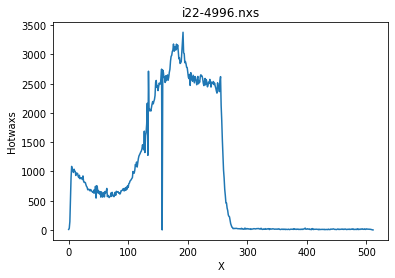

In [8]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt

# open Nexus file
f = h5py.File("nexus/i22-4996.nxs", "r")

# get dataset
ds = f["/entry1/Hotwaxs/data"]

# check shape (1,1,512)
print(f"dataset shape = {ds.shape}")

# extract last dimension to numpy array
X = ds[(0,0)]
size = X.shape[0] 
Y = np.arange(size)
print(size)
print(Y)
ax = plt.gca()
ax.set_title("i22-4996.nxs")
ax.set_xlabel("X")
ax.set_ylabel("Hotwaxs")
plt.plot(Y, X)
plt.show()

## 6
Now we can plot the data independent of Dawn, we can perform additional customised processing as desired.  Say, for example, we wish to apply a filter to the data.  We could use SciPy's "savgol" filter:
* <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html">scipy.signal.savgol_filter</a>

dataset shape = (1, 1, 512)


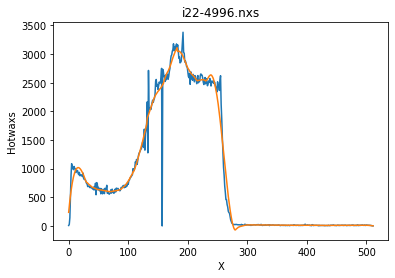

In [10]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


# open Nexus file
f = h5py.File("nexus/i22-4996.nxs", "r")

# get dataset
ds = f["/entry1/Hotwaxs/data"]

# check shape (1,1,512)
print(f"dataset shape = {ds.shape}")

# extract last dimension to numpy array
Y = ds[(0,0)]
size = Y.shape[0] 
X = np.arange(size)
# window size 51, polynomial order 3
Y_filtered = savgol_filter(Y, 51, 3) 


ax = plt.gca()
ax.set_title("i22-4996.nxs")
ax.set_xlabel("X")
ax.set_ylabel("Hotwaxs")
plt.plot(X, Y)
plt.plot(X, Y_filtered)
plt.show()

## 7
Let's turn our attention to a different example; a 2 dimensional plot of data from
<pre>MoKedge_1_15.nxs</pre>

We will be making two plots: plotting the quantity "It" and differences "d(It)" against "energy".  To begin with we will open the Nexus file and check on the dimensionality of the data:

In [11]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt

fileName = "nexus/MoKedge_1_15.nxs"
f = h5py.File(fileName, "r")

X = f["/entry1/counterTimer01/Energy"][()]
Y = f["/entry1/counterTimer01/It"][()]

print(f"Shape of Energy data: {X.shape}")
print(f"Shape of It data: {Y.shape}")

Shape of Energy data: (489,)
Shape of It data: (489,)


## 8
When we take the differences of the "It" data we will end up with one less value.  We will need to take this into account in the subsequent plot by dropping one of the "Energy" points: 

In [12]:
import numpy as np
dY = np.diff(Y)
print(f"Shape of d(It) data: {dY.shape}")

Shape of d(It) data: (488,)


## 9
Let's take a look at the first plot:

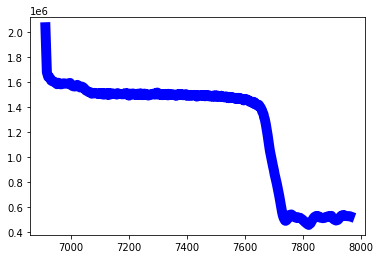

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

fileName = "nexus/MoKedge_1_15.nxs"
f = h5py.File(fileName, "r")

Y = f["/entry1/counterTimer01/It"][()]
X = f["/entry1/counterTimer01/Energy"][()]
kwargs = {'linewidth':1, 'color':'red'}

# plot It
plt.plot(X, Y, linewidth=10, color='blue')
#plt.plot(X, Y, **kwargs)
plt.show()

## 10
Adding some plot labels and including a Savgol filter we could improve the above with the code below.  Notice the use of Unicode variable names
<pre>Ŷ = savgol_filter ...
k̂wargs = ...</pre>

The Ŷ and k̂ characters are examples of combination Unicode characters.  

For more information on Unicode:
<a href="https://unicode-table.com/en">unicode table</a>

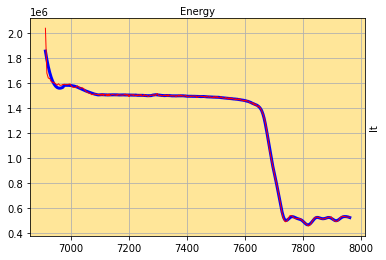

In [15]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter  # for smoothing

def set_title(title):
    figure = plt.gcf()
    figure.canvas.set_window_title(title)

def setupAxes(xLabel, yLabel):
    set_title("MoKedge_1_15.nxs")
    ax = plt.gca()
    ax.set_facecolor((1.0, 0.9, 0.6))
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.xaxis.set_label_position("top")
    ax.yaxis.set_label_position("right")
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
    plt.grid(True)

fileName = "nexus/MoKedge_1_15.nxs"
f = h5py.File(fileName, "r")

Y = f["/entry1/counterTimer01/It"][()]
X = f["/entry1/counterTimer01/Energy"][()]
Ŷ = savgol_filter(Y, 25, 3) # smoothing window size 25, polynomial order 3

k̂wargs = {'linewidth':3, 'color':'blue'}
kwargs = {'linewidth':1, 'color':'red'}

# plot It
setupAxes('Energy', 'It')
plt.plot(X, Ŷ, **k̂wargs)
plt.plot(X, Y, **kwargs)
plt.show()

## 11
We can now add the differences plot.  Both plots are shown below:

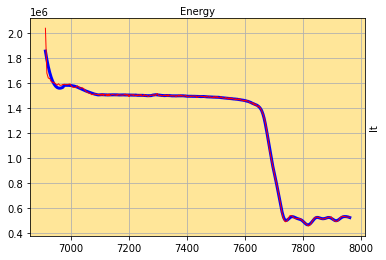

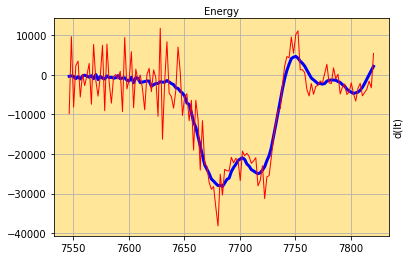

In [16]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter  # for smoothing

def set_title(title):
    figure = plt.gcf()
    figure.canvas.set_window_title(title)

def setupAxes(xLabel, yLabel):
    set_title("MoKedge_1_15.nxs")
    ax = plt.gca()
    ax.set_facecolor((1.0, 0.9, 0.6))
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.xaxis.set_label_position("top")
    ax.yaxis.set_label_position("right")
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
    plt.grid(True)

fileName = "nexus/MoKedge_1_15.nxs"
f = h5py.File(fileName, "r")

Y = f["/entry1/counterTimer01/It"][()]
X = f["/entry1/counterTimer01/Energy"][()]
Ŷ = savgol_filter(Y, 25, 3) # smoothing window size 25, polynomial order 3
dY = np.diff(Y)
dŶ = savgol_filter(dY, 25, 3) # smoothing window size 25, polynomial order 3

k̂wargs = {'linewidth':3, 'color':'blue'}
kwargs = {'linewidth':1, 'color':'red'}

# plot It
setupAxes('Energy', 'It')
plt.plot(X, Ŷ, **k̂wargs)
plt.plot(X, Y, **kwargs)
plt.show()

# plot d(It)
setupAxes('Energy', 'd(It)')
left = 280
right = 70
plt.plot(X[left:-right-1], dŶ[left:-right], **k̂wargs)
plt.plot(X[left:-right-1], dY[left:-right], **kwargs)
plt.show()